# 01 – Data Exploration

This notebook is part of a team project for the Data Science Certificate at the University of Toronto’s Data Sciences Institute. The purpose of this notebook is to perform initial data exploration of the **Retail Sales Dataset** and provide actionable insights for further modeling.

## Objectives
- Understand dataset structure
- Perform exploratory visualizations
- Generate statistical summaries
- Identify insights for business questions

Our main business goal is to explore how **price per unit**, **product category**, **age**, and **gender** impact purchasing behavior and sales totals.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in notebook
%matplotlib inline

# Load dataset
df = pd.read_csv("data/raw/retail_sales_dataset.csv") 
df['Date'] = pd.to_datetime(df['Date']) 

# Preview the data
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [3]:
# Check for missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [4]:
# Summary stats
df.describe(include='all')


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,NaN,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,2023-07-03 00:25:55.200000256,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,NaN,NaN,64.00000,NaN,4.000000,500.000000,2000.000000


In [5]:
# DATA QUALITY CHECKS
# 1. Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"\nDuplicate rows: {duplicates.shape[0]}")

# 2. Check for invalid (negative or zero) numeric values
neg_values = df[(df['Quantity'] <= 0) | (df['Price per Unit'] <= 0) | (df['Total Amount'] <= 0)]
print(f"Negative or zero values: {neg_values.shape[0]}")

# 3. Validate 'Total Amount' = 'Quantity' * 'Price per Unit'
df['Calculated Amount'] = df['Quantity'] * df['Price per Unit']
mismatches = df[df['Total Amount'] != df['Calculated Amount']]
print(f"Total Amount mismatches: {mismatches.shape[0]}")

# 4. Check for unrealistic customer age values
invalid_age = df[(df['Age'] < 10) | (df['Age'] > 100)]
print(f"Unrealistic age values: {invalid_age.shape[0]}")

# 5. Review unique values in Gender column
print("Unique gender values:", df['Gender'].unique())


Duplicate rows: 0
Negative or zero values: 0
Total Amount mismatches: 0
Unrealistic age values: 0
Unique gender values: ['Male' 'Female']


## Dataset Overview

This dataset contains 1,000 retail transactions with the following features:

- `Transaction ID`: Unique identifier per transaction
- `Date`: Transaction date
- `Customer ID`: Anonymized customer identifier
- `Gender`: Customer gender
- `Age`: Customer age
- `Product Category`: Product type (Beauty, Clothing, Electronics)
- `Quantity`: Number of items purchased
- `Price per Unit`: Cost per item
- `Total Amount`: Transaction value = `Quantity × Price per Unit`

All columns are well-formatted. There are no missing or duplicate values, and the calculated field `Total Amount` is consistent with `Quantity * Price per Unit`.


---
## Exploratory Data Analysis (EDA)

This section explores key patterns in the dataset through visualizations:
- Sales trends
- Purchase behavior by category, gender, and age
- Average order values and price distributions


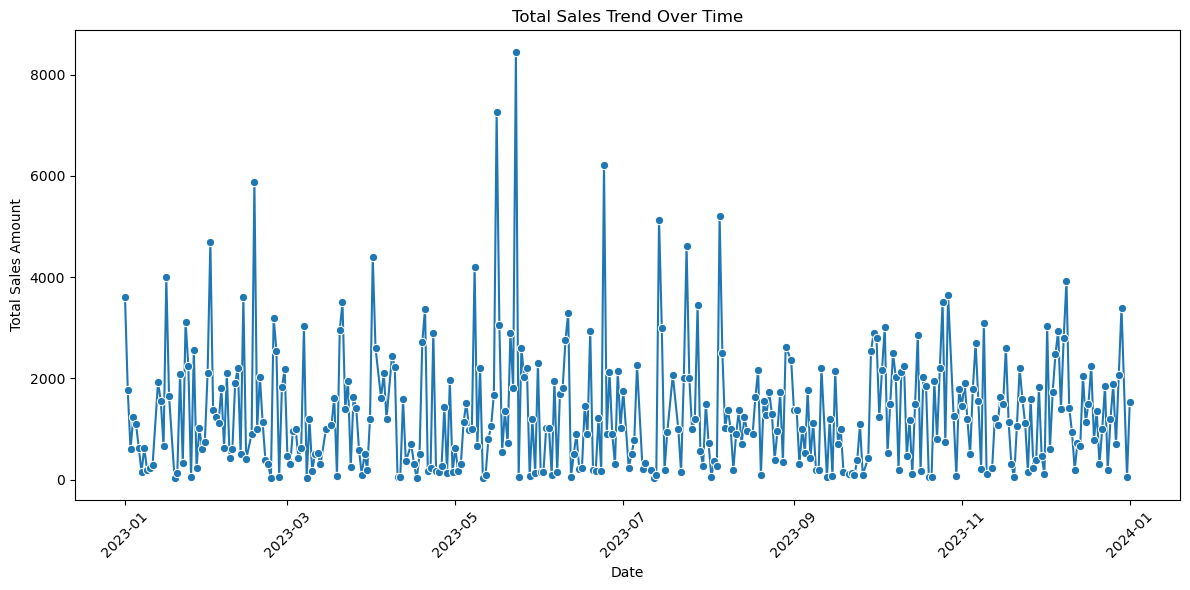

In [6]:
# Sales trend over time
sales_trend = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Date', y='Total Amount', marker='o')
plt.title("Total Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/sales_trend_over_time.png", dpi=300)
plt.show()


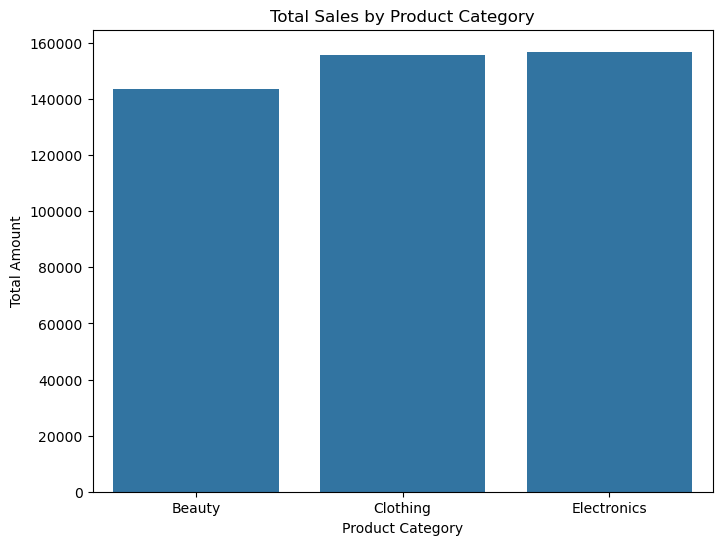

In [7]:
# Total sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=category_sales, x='Product Category', y='Total Amount')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Amount")
plt.savefig("images/total_sales_by_product_category.png", dpi=300)
plt.show()


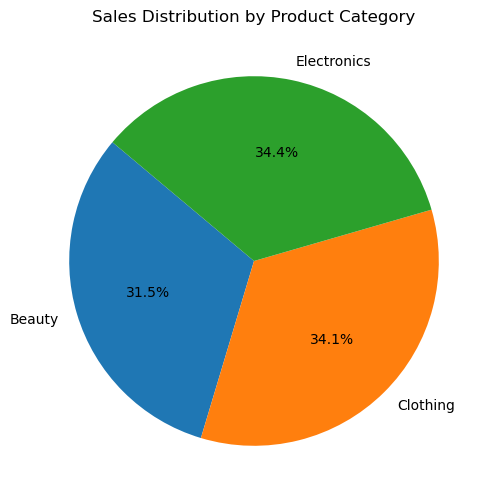

In [15]:
# Pie chart for product category share
plt.figure(figsize=(6, 6))
plt.pie(category_sales['Total Amount'], labels=category_sales['Product Category'], autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Product Category")
plt.savefig("images/sales_distribution_by_product_category_pie.png", dpi=300)
plt.show()


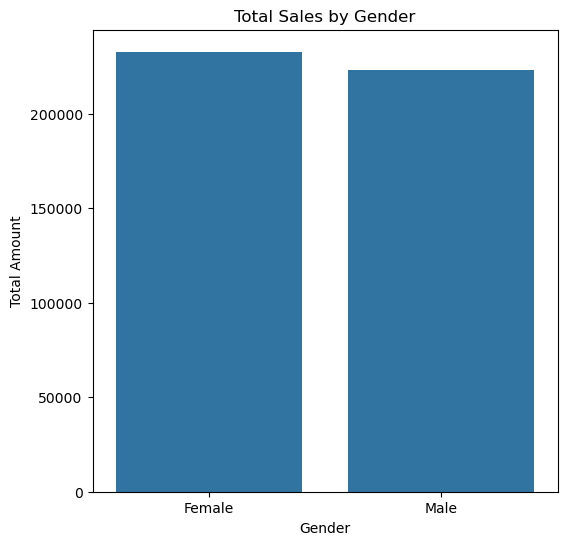

In [9]:
# Bar chart for gender-based total sales
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=gender_sales, x='Gender', y='Total Amount')
plt.title("Total Sales by Gender")
plt.ylabel("Total Amount")
plt.savefig("images/total_sales_by_gender.png", dpi=300)
plt.show()


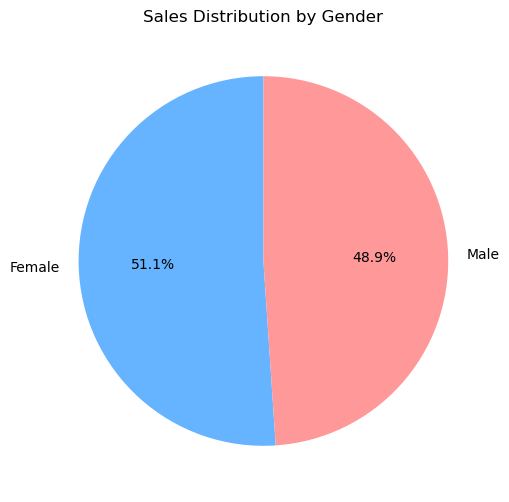

In [10]:
# Pie chart for gender share
plt.figure(figsize=(6, 6))
plt.pie(gender_sales['Total Amount'], labels=gender_sales['Gender'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title("Sales Distribution by Gender")
plt.savefig("images/sales_distribution_by_gender.png", dpi=300)
plt.show()


C:\Users\Babichka\AppData\Local\Temp\ipykernel_14564\2515299760.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()


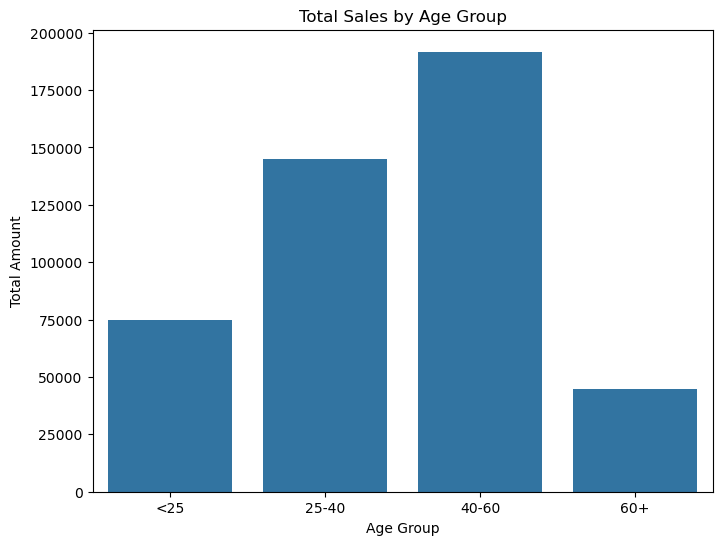

In [11]:
# Create Age Groups
bins = [0, 25, 40, 60, 100]
labels = ['<25', '25-40', '40-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Bar chart for total amount by age group
age_sales = df.groupby('Age Group')['Total Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=age_sales, x='Age Group', y='Total Amount')
plt.title("Total Sales by Age Group")
plt.savefig("images/total_sales_by_age_group.png", dpi=300)
plt.show()


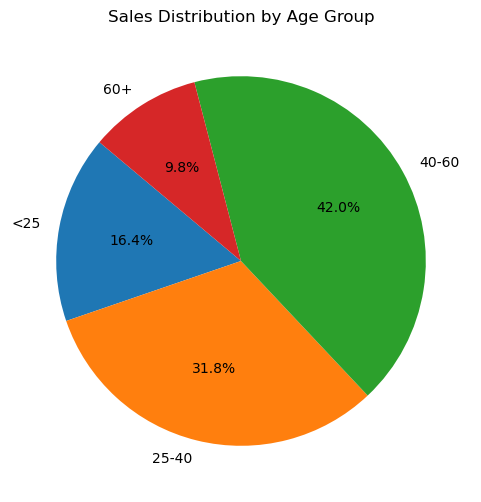

In [16]:
# Pie chart for total sales distribution by age group
plt.figure(figsize=(6, 6))
plt.pie(
    age_sales['Total Amount'],
    labels=age_sales['Age Group'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Sales Distribution by Age Group")
plt.savefig("images/sales_pie_by_age_group.png", dpi=300)
plt.show()


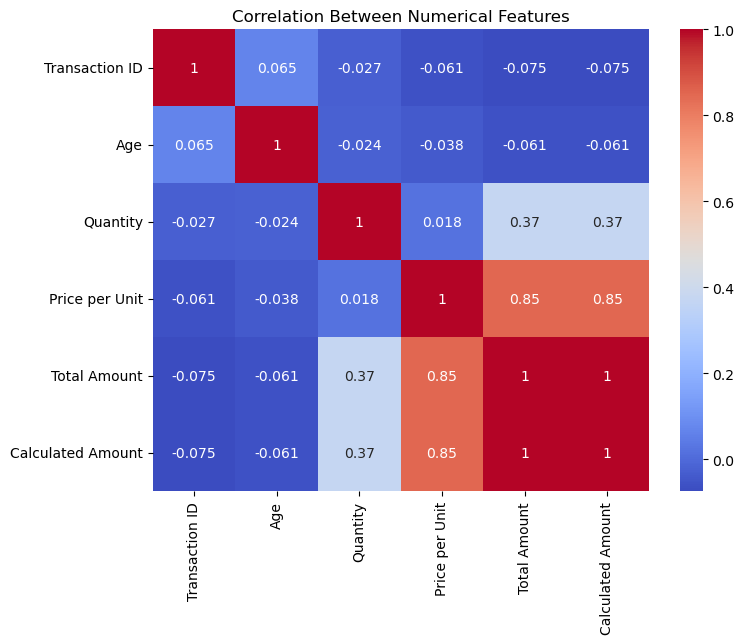

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.savefig("images/correlation_between_numerical_features.png", dpi=300)
plt.show()

In [13]:
# Calculate AOV = Total Amount per transaction
aov = df['Total Amount'].mean()
print(f"Average Order Value (AOV): ${aov:.2f}")


Average Order Value (AOV): $456.00


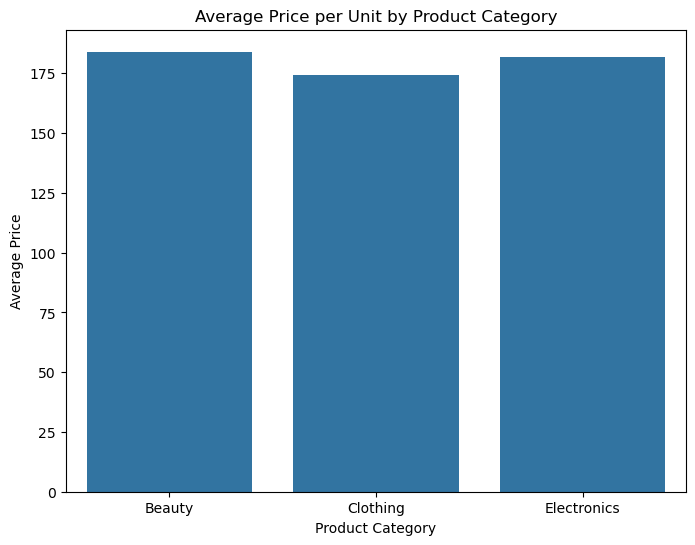

In [19]:
# Average price per unit by product category
avg_price_category = df.groupby('Product Category')['Price per Unit'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_category, x='Product Category', y='Price per Unit')
plt.title("Average Price per Unit by Product Category")
plt.ylabel("Average Price")
plt.savefig("images/average_price_per_unit_by_product_category.png", dpi=300)
plt.show()


### Key Insights from EDA

An initial exploration of the retail sales dataset was completed to understand its structure, content, and quality. Below are the key findings:

### Dataset Overview

- **Rows**: 1,000 transactions
- **Columns**: 9
- **Key fields**:
  - `Date`, `Customer ID`, `Gender`, `Age`
  - `Product Category`, `Quantity`, `Price per Unit`, `Total Amount`

### Exploratory Insights

- **Sales Trend:** Sales fluctuate across dates with noticeable spikes around mid-year.
- **Product Category:** Electronics contributes the highest revenue, followed by Clothing and Beauty.
- **Gender Split:** Females account for slightly higher overall sales compared to males.
- **Age Segments:** Customers aged 25–40 and 40–60 contribute the most to sales volume.
- **Average Order Value (AOV):** Around $456.00.
- **Price per Unit:** Beauty items have the highest average price per unit, while Clothing is the most affordable category.

These findings will guide our feature engineering and modeling decisions in the next phase.
